In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import fitsio as ft
import pandas as pd
from utils import hpix2radec
from nnbar import NNBAR

camb is not installed!


In [2]:
df = pd.read_hdf('/Volumes/TimeMachine/data/DR7/DR7meta.h5')
depth_g = df['depth_g_total'].values

galmap = hp.read_map('/Volumes/TimeMachine/data/DR7/eBOSS.ELG.NGC.DR7.cut.hp256.fits', verbose=False)
fracmap = hp.read_map('/Volumes/TimeMachine/data/DR7/frac.hp.256.fits', verbose=False)
mask = hp.read_map('/Volumes/TimeMachine/data/DR7/mask_data_mock.cut.hp.256.fits', verbose=False) > 0
wnn = hp.read_map('/Volumes/TimeMachine/data/DR7/results/regression/nn_p/nn-weights.hp256.fits', verbose=False)
wnn2 = hp.read_map('/Volumes/TimeMachine/data/DR7/results_referee/nn_p/nn-weights.hp256.fits', verbose=False)

In [3]:
chi2 = lambda y, ye:(((y-1)/ye)**2).sum()
def run(maski, wnni):    
    
    # get mean density
    ndepth = NNBAR(galmap, fracmap, maski, depth_g, selection=wnni)
    ndepth.run()

    
    y = ndepth.output['nnbar']
    x = (ndepth.output['bin_edges'][:-1])#+ndepth.output['bin_edges'][1:])
    ye = ndepth.output['nnbar_err']

    nan = np.isnan(y) | np.isnan(ye)
    if nan.sum()!=0:
        print(y, nan.sum())
        y = y[~nan]
        x = x[~nan]
        ye = ye[~nan]


    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.errorbar(x, y, yerr=ye, marker='o', color='b', ls='none')
    for xmin in x[:-3]:
        chi2v = chi2(y[x>xmin], ye[x>xmin])
        print(xmin, chi2v)
        ax2.scatter(xmin, chi2v, 
                    color='darkorange', marker='s', facecolors='none')


    ax1.axhline(1, ls=':', color='blue')
    ax2.axhline(50, ls='--', color='orange')
    ax2.text(24.6, 52, '95% Null mocks', color='orange')

    ax1.set_xlabel('Depth_g')
    ax1.set_ylabel('N/Nbar', color='b')
    ax2.set_ylabel('Chi2(>depth_g)', color='darkorange', fontweight='bold')

min sys : 22.80  max sys : 44.58
num of pts : 86812, num of bins : 20
22.80359649658203 77.18950267030411
23.856889724731445 64.12470726409026
23.98033905029297 29.936894719894994
24.052764892578125 23.107186564149313
24.106904983520508 23.037452872946066
24.149980545043945 22.61534857910972
24.185871124267578 22.41652654353412
24.21746253967285 21.4745584237836
24.244470596313477 21.399560006562034
24.269676208496094 19.06005035448309
24.292816162109375 18.465153763369212
24.314373016357422 8.39836815100012
24.336261749267578 6.555259577070807
24.35948944091797 4.760182622434751
24.38421058654785 4.342370247335485
24.41143035888672 4.222266712225517
24.44207000732422 0.5733330626665981


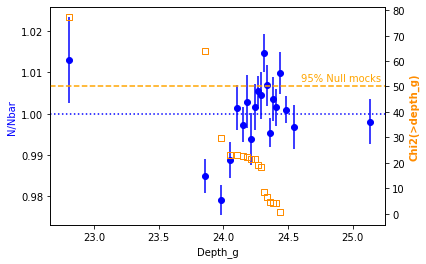

In [4]:
run(mask, wnn)

min sys : 22.80  max sys : 44.58
num of pts : 86812, num of bins : 20
22.80359649658203 76.05708241187696
23.856889724731445 63.68130948650898
23.98033905029297 28.58824008931185
24.052764892578125 22.077443930764066
24.106904983520508 21.972727540575054
24.149980545043945 21.68728192674811
24.185871124267578 21.45954320935319
24.21746253967285 20.553548170722834
24.244470596313477 20.499742609658007
24.269676208496094 18.102235365447555
24.292816162109375 17.513022057660304
24.314373016357422 8.043981396401392
24.336261749267578 6.093124145786259
24.35948944091797 4.165287669752598
24.38421058654785 3.833866980225297
24.41143035888672 3.7825667616364016
24.44207000732422 0.5361744426592355


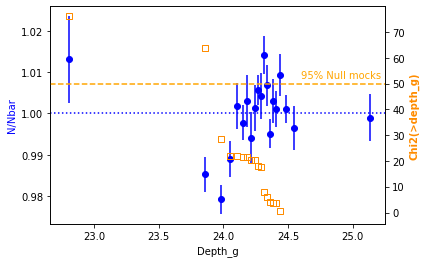

In [5]:
run(mask, wnn2)

min sys : 23.94  max sys : 44.58
num of pts : 79431, num of bins : 20
23.940011978149414 42.65558891966264
24.020904541015625 25.601204021181964
24.077476501464844 21.908253788208484
24.1225528717041 20.033503440630138
24.160667419433594 19.78348411742918
24.192352294921875 19.379987983616054
24.22056007385254 17.817054229231523
24.2452392578125 17.43462536838422
24.268428802490234 15.466334126557406
24.289936065673828 14.636860727637256
24.309856414794922 11.347829481730562
24.330137252807617 6.324841531712778
24.350889205932617 4.54992513168116
24.372892379760742 3.632340535868652
24.396543502807617 3.137193544043095
24.42321014404297 2.125001490457181
24.453765869140625 0.8362498609506103


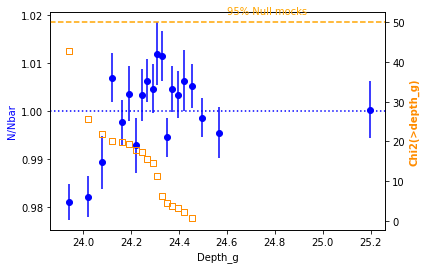

In [5]:
run(mask & (depth_g >= 23.94))

In [7]:
ra, dec = hpix2radec(256, np.argwhere(mask).flatten())

Text(0.5, 0, 'depth g')

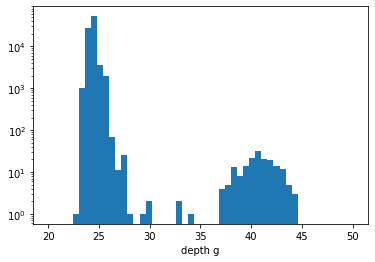

In [11]:
plt.hist(depth_g[mask], bins=50, range=(20, 50))
plt.yscale('log')
plt.xlabel('depth g')

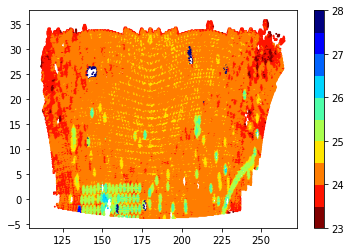

In [10]:
cmap = plt.cm.get_cmap('jet_r', 10)
plt.scatter(ra, dec, 1, c=depth_g[mask], marker='H',  
            cmap=cmap, vmin=23, vmax=28)
plt.colorbar()